# Testing the Slime Mould Algorithm

The Slime Mould Algorithm (SMA) is a bio-inspired optimizer based on the oscillation mode of slime mould in nature. Following CoFI's
    vector abstraction principle, this tool operates purely on user defined
    parameter vectors while supporting spatial regularization at the utility level.

Based on the paper:
    [Li, S., Chen, H., Wang, M., Heidari, A. A., & Mirjalili, S. (2020). Slime mould algorithm: A new method for stochastic optimization. Future Generation Computer Systems, 111, 300-323.](https://www.sciencedirect.com/science/article/pii/S0167739X19320941)

The python implementation of SMA used here is from [The mealpy initiative](https://mealpy.readthedocs.io/en/latest) by 
  [Van Thieu, Nguyen and Mirjalili, Seyedali (2023). MEALPY: An open-source library for latest meta-heuristic algorithms in Python, Journal of Systems Architecture,
   Elsevier, doi=10.1016/j.sysarc.2023.102871](https://www.sciencedirect.com/science/article/pii/S1383762123000504)

Interface to CoFI developed by by Juerg Hauser and Claude.
August 2025.

-------
## Direct Search algorithms
The Slime mould Algorithm is a recent popular metaheuristic search algorithm that has found applications across the Computer Sciences and Emngineering fields. It attempts to find the vector of parameters/unknowns which minimizes some defined objective function, optionally within a set of parameter bounds. Typically the parameter vector would describe a set of unknowns that the user wishes to find best fit values, e.g. that minimize the misfit between observations and predictions from a model controlled by the sought after parameters.

As with all metaheuristic optimization algorithms it is a case of *caveat-emptor*, or *buyer beware*. For more information the reader is refered to the paper by Li et. al. (cited above) and for a discussion in a geosciences context 
[Sambridge, M., and Mosegaard, K. (2002). Monte Carlo methods in Geophysical inverse problems. Rev. Geophys., 40, doi:10.1029/2000RG000089.](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2000RG000089) 

A readable account of the explosion of such meta-heuristic algorithms, their promise and pitfalls is by
[Sörensen, K. (2015). Metaheuristics—the metaphor exposed. International Transactions in Operational Research, 22(1), 3–18. https://doi.org/10.1111/itor.12001](https://onlinelibrary.wiley.com/doi/full/10.1111/itor.12001)

-------

## Imports and setup

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import seaborn as sns
import warnings
import logging
# CoFI imports
from cofi import BaseProblem, InversionOptions, Inversion

# Set style for beautiful plots
plt.style.use('default')
sns.set_palette("husl")
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print(" Welcome to the Slime Mould Algorithm Demo!")
print(" Imports successful - ready to explore bio-inspired optimization")

 Welcome to the Slime Mould Algorithm Demo!
 Imports successful - ready to explore bio-inspired optimization


##  Test Function: Modified Himmelblau Function

To demonstrate the Slime Mould algorithm we will use a modified version of the classic Himmelblau function, which is a well-known multi-modal optimization benchmark. The original Himmelblau function has four global minima, making it an excellent test case for global optimization algorithms.

### Function Definition

$$f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 + (x - 3)^2 + (y - 2)^2$$

The modification adds a regularization term $(x - 3)^2 + (y - 2)^2$ that creates a preferred global minimum at $(3, 2)$.

In [2]:
def modified_himmelblau(x):
    """
    Modified Himmelblau function with additional regularization term.
    
    Original function has 4 global minima. The modification adds a bias
    towards the point (3, 2), making it the preferred global minimum.
    
    Args:
        x: array-like, [x1, x2] coordinates
        
    Returns:
        float: Function value
    """
    x1, x2 = x[0], x[1]
    # Original Himmelblau terms
    term1 = (x1**2 + x2 - 11)**2
    term2 = (x1 + x2**2 - 7)**2
    # Regularization term (bias towards (3, 2))
    term3 = (x1 - 3)**2 + (x2 - 2)**2
    
    return term1 + term2 + term3

# Test the function
test_point = [3.0, 2.0]
print(f" Function value at (3, 2): {modified_himmelblau(test_point):.6f}")
print(f" This should be close to the global minimum!")

 Function value at (3, 2): 0.000000
 This should be close to the global minimum!


##  Visualizing the Optimization Landscape

Let's visualize the modified Himmelblau function to understand the optimization challenge:

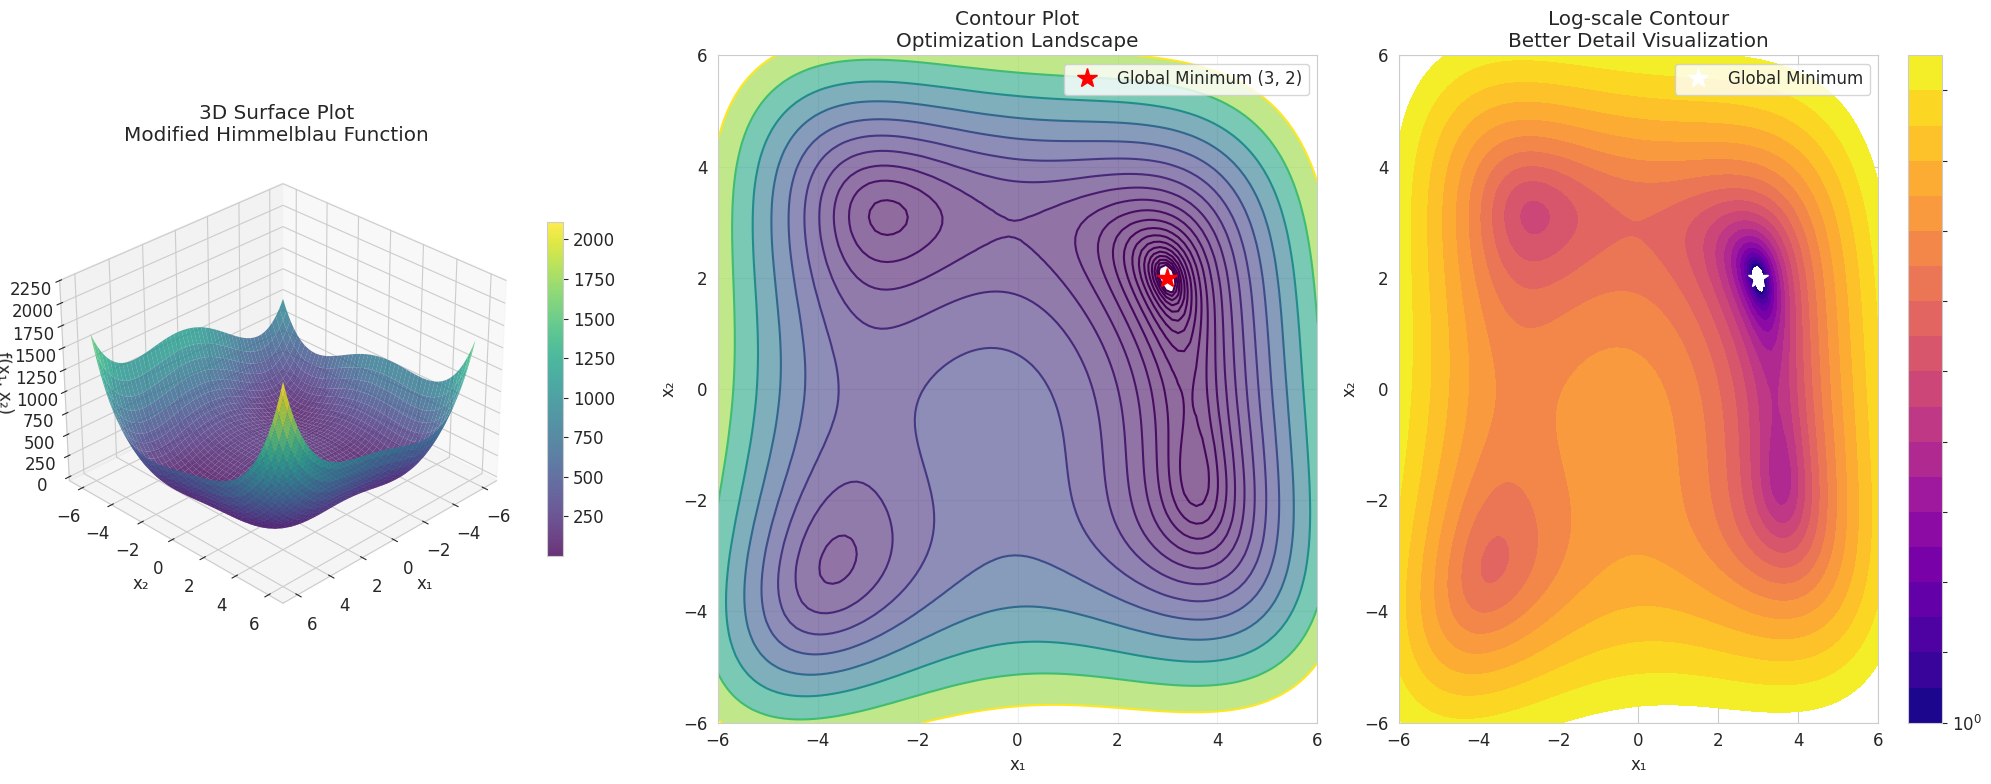

Visualization complete!
The function has multiple local minima with a preferred global minimum at (3, 2)


In [3]:
# Create a meshgrid for visualization
x_range = np.linspace(-6, 6, 100)
y_range = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x_range, y_range)

# Set the font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

# Evaluate function over the grid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = modified_himmelblau([X[i, j], Y[i, j]])

# Create subplots
fig = plt.figure(figsize=(20, 8))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0)
ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_zlabel('f(x₁, x₂)')
ax1.set_title('3D Surface Plot\nModified Himmelblau Function')
ax1.view_init(elev=30, azim=45)
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Contour plot
ax2 = fig.add_subplot(132)
levels = np.logspace(0, 3, 20)  # Logarithmic levels for better visualization
contour = ax2.contour(X, Y, Z, levels=levels, cmap='viridis')
ax2.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
ax2.set_xlabel('x₁')
ax2.set_ylabel('x₂')
ax2.set_title('Contour Plot\nOptimization Landscape')
ax2.grid(True, alpha=0.3)

# Mark the global minimum
ax2.plot(3, 2, 'r*', markersize=15, label='Global Minimum (3, 2)')
ax2.legend()

# Log-scale contour for better detail
ax3 = fig.add_subplot(133)
contour_log = ax3.contourf(X, Y, Z, levels=levels, norm=LogNorm(), cmap='plasma')
ax3.set_xlabel('x₁')
ax3.set_ylabel('x₂')
ax3.set_title('Log-scale Contour\nBetter Detail Visualization')
ax3.plot(3, 2, 'w*', markersize=15, label='Global Minimum')
ax3.legend()
fig.colorbar(contour_log, ax=ax3)

plt.tight_layout()
plt.show()

print("Visualization complete!")
print("The function has multiple local minima with a preferred global minimum at (3, 2)")

##  Setting Up the CoFI Optimization Problem

Now let's set up our optimization problem using CoFI's elegant framework:

In [4]:
# Define the optimization problem using CoFI
problem = BaseProblem()
problem.set_objective(modified_himmelblau)  # Our objective function
problem.set_model_shape((2,))               # 2D optimization problem
problem.set_bounds((-6, 6))                 # Search space bounds

print(" CoFI Problem Setup Complete!")
print(f" Problem dimension: {np.prod(problem.model_shape)}")
print(f" Objective function: Modified Himmelblau")
print(f" Search bounds: {problem.bounds}")
print("\n Ready for optimization with Slime Mould Algorithm!")

 CoFI Problem Setup Complete!
 Problem dimension: 2
 Objective function: Modified Himmelblau
 Search bounds: (-6, 6)

 Ready for optimization with Slime Mould Algorithm!


Now we try out SMA on the test problem. As with many heuristic algorithms there are control parameters that must typically be tuned for each problem, or problem class.

Key SMA parameters to experiment with:

- **`epoch`**: Number of iterations (higher = more thorough search)
- **`pop_size`**: Population size (higher = better exploration)
- **`pr`**: Probability parameter (controls exploration/exploitation balance)
- **`algorithm`**: Choose between "OriginalSMA" and "DevSMA"
- **`mode`**: Parallel execution ("single" (default), "thread", "process", "swarm")

For further details on control parameters the reader is refered to [The mealpy documentation for SMA](https://mealpy.readthedocs.io/en/latest/pages/models/mealpy.bio_based.html#module-mealpy.bio_based.SMA) and also the original paper Li et al. (2020).

## Note: I managed to get this to run OK with mode options `single`,`thread` and `swarm`, but it failed under process. Looks like an interface problem with Himmblau function. Is this something to worry about? 

In [5]:
# Configure SMA optimization options
sma_options = InversionOptions()
sma_options.set_tool("mealpy.sma")
sma_options.set_params(
    algorithm="OriginalSMA", # Use the original SMA variant
    epoch=100,               # Number of iterations
    pop_size=50,             # Population size (number of slime moulds)
    pr=0.03,                 # Probability parameter
    seed=42,                 # For reproducible results
    verbose=False,           # Reduce output for cleaner notebook
    mode = "single"          # Parallel execution ("single" (default), "thread", "process", "swarm")
)

print(" SMA Configuration:")
print(f"    Algorithm: OriginalSMA")
print(f"    Epochs: 100")
print(f"    Population: 50 slime moulds")
print(f"    Seed: 42 (reproducible results)")

# Run the optimization with output suppression
print("\n Starting SMA optimiza tion...")

# Suppress mealpy output during optimization
import sys
from io import StringIO
old_stdout = sys.stdout
sys.stdout = StringIO()

try:
    sma_inversion = Inversion(problem, sma_options)
    sma_result = sma_inversion.run()
finally:
    sys.stdout = old_stdout

print(" SMA Optimization Complete!")
print(f" Optimal solution: [{sma_result.model[0]:.6f}, {sma_result.model[1]:.6f}]")
print(f" Objective value: {sma_result.objective:.8f}")
print(f" Success: {sma_result.success}")

# Calculate distance from true optimum
true_optimum = np.array([3.0, 2.0])
distance = np.linalg.norm(sma_result.model - true_optimum)
print(f" Distance from true optimum (3, 2): {distance:.6f}")

2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=100, pop_size=50, p_t=0.03)
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 29.069388266973725, Global best: 29.069388266973725, Runtime: 0.00219 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 2.8392717949357444, Global best: 2.8392717949357444, Runtime: 0.00221 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 2.28340322647189, Global best: 2.28340322647189, Runtime: 0.00218 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 2.11110548435937, Global best: 2.11110548435937, Runtime: 0.00232 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 9.308677537839351, Global best: 2.11110548435937, Runtime: 0.00206 seco

 SMA Configuration:
    Algorithm: OriginalSMA
    Epochs: 100
    Population: 50 slime moulds
    Seed: 42 (reproducible results)

 Starting SMA optimiza tion...


2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 75, Current best: 0.01633040148728747, Global best: 0.00012950633939942343, Runtime: 0.00226 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 76, Current best: 0.000996355846192548, Global best: 0.00012950633939942343, Runtime: 0.00215 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 77, Current best: 0.0005101366218495849, Global best: 0.00012950633939942343, Runtime: 0.00204 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 78, Current best: 0.003251541577476066, Global best: 0.00012950633939942343, Runtime: 0.00202 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 79, Current best: 0.0020511476745938844, Global best: 0.00012950633939942343, Runtime: 0.00209 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.Original

 SMA Optimization Complete!
 Optimal solution: [3.000135, 1.999761]
 Objective value: 0.00000108
 Success: True
 Distance from true optimum (3, 2): 0.000275


### Compare two SMA versions

This next cell runs two version of SMA available within mealpy on the test problem and compares results.

In [6]:
# Compare different SMA algorithms
algorithms = ["OriginalSMA", "DevSMA"]
results = {}
colors = ['#FF6B6B', '#4ECDC4']

print(" Comparing SMA Algorithm Variants...\n")

# Suppress mealpy output during optimization runs
import sys
from io import StringIO

for i, algo in enumerate(algorithms):
    # Configure options for each algorithm
    options = InversionOptions()
    options.set_tool("mealpy.sma")
    options.set_params(
        algorithm=algo,
        epoch=80,
        pop_size=40,
        seed=42
    )
    
    # Run optimization with suppressed output
    print(f" Running {algo}...")
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    
    try:
        inversion = Inversion(problem, options)
        result = inversion.run()
    finally:
        sys.stdout = old_stdout
    
    # Store results
    results[algo] = {
        'solution': result.model,
        'objective': result.objective,
        'distance': np.linalg.norm(result.model - true_optimum)
    }
    
    print(f"    Solution: [{result.model[0]:.4f}, {result.model[1]:.4f}]")
    print(f"    Objective: {result.objective:.6f}")
    print(f"    Distance: {results[algo]['distance']:.6f}\n")

print(" Algorithm Comparison Complete!")

2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=80, pop_size=40, p_t=0.03)
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 19.51679636488204, Global best: 15.899419511381941, Runtime: 0.00200 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 15.106354307572733, Global best: 15.106354307572733, Runtime: 0.00221 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 15.014465043210798, Global best: 15.014465043210798, Runtime: 0.00173 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 14.604713228213742, Global best: 14.604713228213742, Runtime: 0.00194 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 16.500107904355225, Global best: 14.604713228213742, Runtime: 0.0

 Comparing SMA Algorithm Variants...

 Running OriginalSMA...
    Solution: [2.9998, 2.0001]
    Objective: 0.000001
    Distance: 0.000194

 Running DevSMA...


2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 24, Current best: 0.0005906403773089051, Global best: 0.0005906403773089051, Runtime: 0.00180 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 25, Current best: 0.0005906403773089051, Global best: 0.0005906403773089051, Runtime: 0.00140 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 26, Current best: 0.0005906403773089051, Global best: 0.0005906403773089051, Runtime: 0.00200 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 27, Current best: 0.0005906403773089051, Global best: 0.0005906403773089051, Runtime: 0.00189 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 28, Current best: 0.0005906403773089051, Global best: 0.0005906403773089051, Runtime: 0.00157 seconds
2025/08/15 03:57:20 PM, INFO, mealpy.bio_based.SMA.DevSMA: >>>Problem: P, Epoch: 29, 

    Solution: [2.9999, 2.0035]
    Objective: 0.000206
    Distance: 0.003456

 Algorithm Comparison Complete!


Now we visualize results.

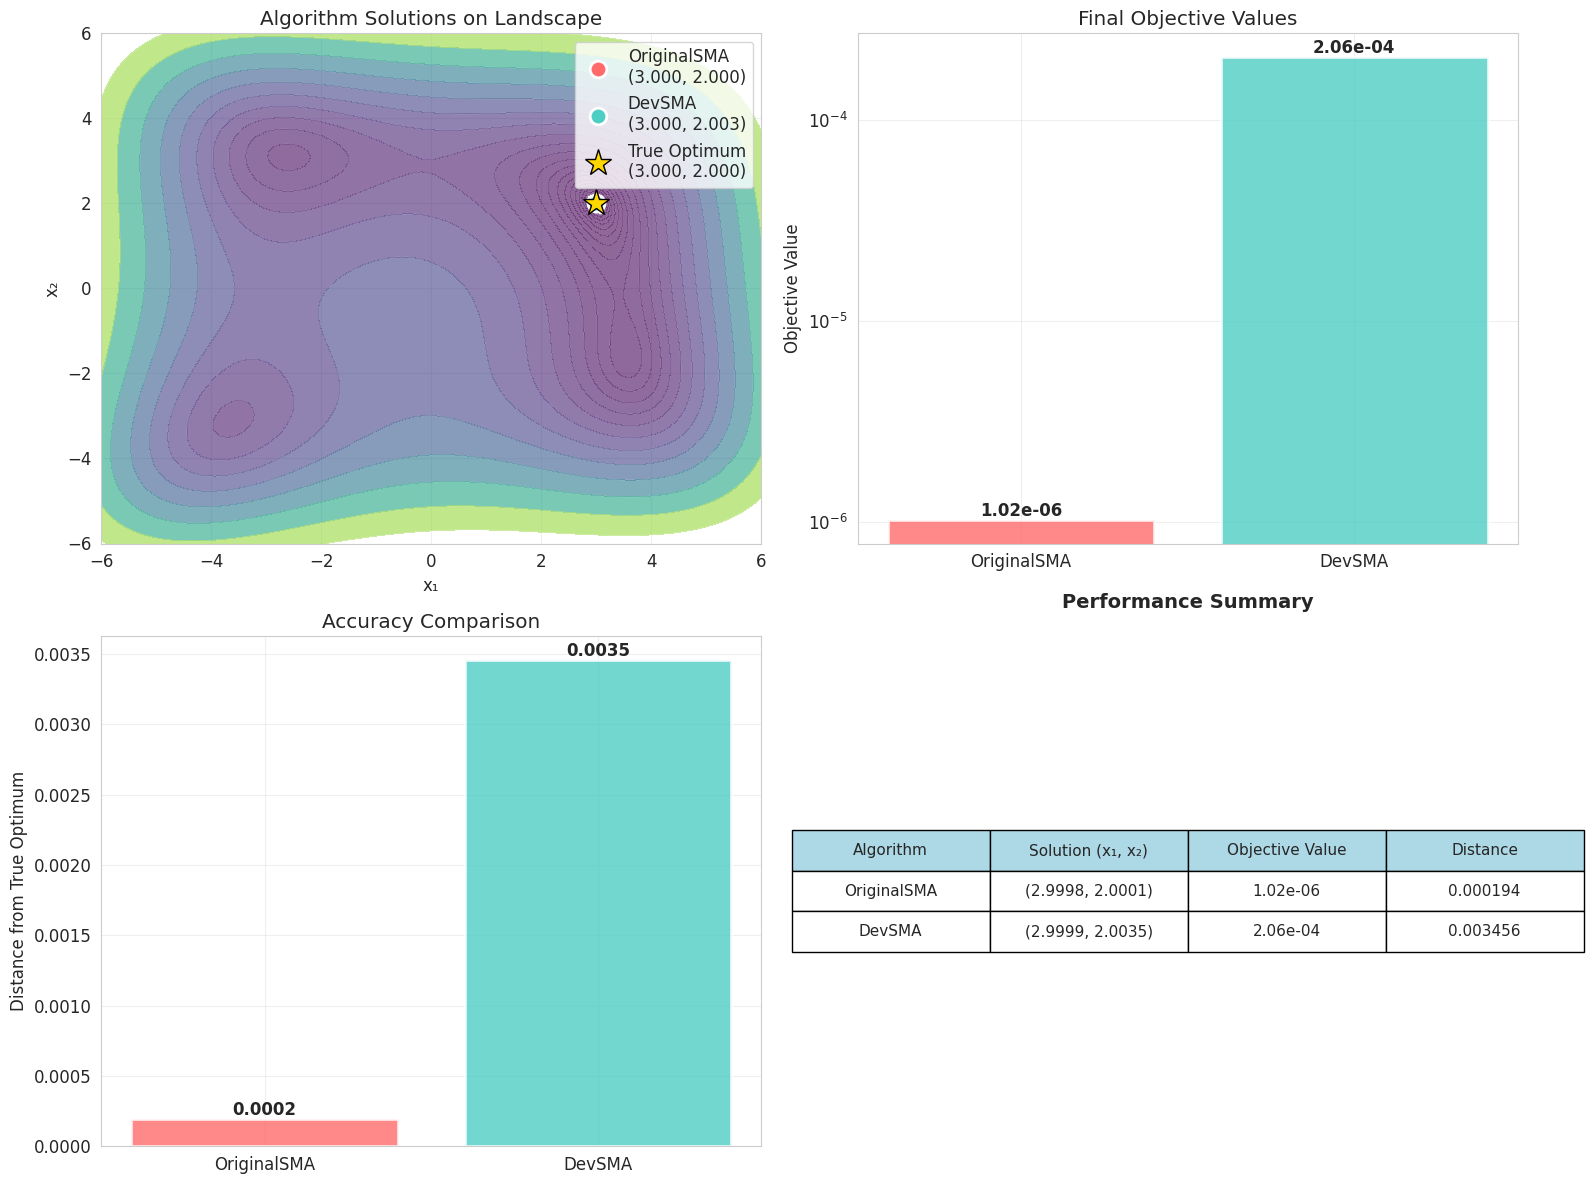

Comprehensive algorithm comparison visualization complete!


In [7]:
# Visualize the comparison results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Set the font to DejaVu Sans
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot 1: Solutions on contour plot
contour = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
ax1.contour(X, Y, Z, levels=levels, colors='white', alpha=0.3, linewidths=0.5)

# Plot solutions
for i, (algo, result) in enumerate(results.items()):
    ax1.plot(result['solution'][0], result['solution'][1], 
            'o', color=colors[i], markersize=12, 
            label=f'{algo}\n({result["solution"][0]:.3f}, {result["solution"][1]:.3f})',
            markeredgecolor='white', markeredgewidth=2)

# Mark true optimum
ax1.plot(3, 2, '*', color='gold', markersize=20, 
        label='True Optimum\n(3.000, 2.000)',
        markeredgecolor='black', markeredgewidth=1)

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title('Algorithm Solutions on Landscape')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Plot 2: Objective values comparison
algos = list(results.keys())
objectives = [results[algo]['objective'] for algo in algos]
bars = ax2.bar(algos, objectives, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
ax2.set_ylabel('Objective Value')
ax2.set_title('Final Objective Values')
ax2.set_yscale('log')  # Log scale for better comparison
ax2.grid(True, alpha=0.3)

# Add value labels on bars
for bar, obj in zip(bars, objectives):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{obj:.2e}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Distance from optimum
distances = [results[algo]['distance'] for algo in algos]
bars = ax3.bar(algos, distances, color=colors, alpha=0.8, edgecolor='white', linewidth=2)
ax3.set_ylabel('Distance from True Optimum')
ax3.set_title('Accuracy Comparison')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, dist in zip(bars, distances):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{dist:.4f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Performance summary table
ax4.axis('tight')
ax4.axis('off')

# Create table data
table_data = []
for algo in algos:
    result = results[algo]
    table_data.append([
        algo,
        f"({result['solution'][0]:.4f}, {result['solution'][1]:.4f})",
        f"{result['objective']:.2e}",
        f"{result['distance']:.6f}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=['Algorithm', 'Solution (x₁, x₂)', 'Objective Value', 'Distance'],
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*4)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 2)
ax4.set_title('Performance Summary', pad=20, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Comprehensive algorithm comparison visualization complete!")

So thw original SMA seems to out perform the `DevSMA` in this case, but the difference is actually small in terms of soution locations relative to the bounds on the model parameters.

### Now we repeat optimizations with different random seeds

In [8]:
# Multiple runs for statistical analysis
n_runs = 10
seeds = range(42, 42 + n_runs)

print(f" Running {n_runs} independent SMA optimizations...\n")

multi_results = {
    'solutions': [],
    'objectives': [],
    'distances': []
}

# Suppress mealpy output during runs
import sys
from io import StringIO

for i, seed in enumerate(seeds):
    # Configure options
    options = InversionOptions()
    options.set_tool("mealpy.sma")
    options.set_params(
        algorithm="OriginalSMA",
        epoch=60,
        pop_size=30,
        seed=seed
    )
    
    # Run optimization with suppressed output
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    
    try:
        inversion = Inversion(problem, options)
        result = inversion.run()
    finally:
        sys.stdout = old_stdout
    
    # Store results
    multi_results['solutions'].append(result.model)
    multi_results['objectives'].append(result.objective)
    distance = np.linalg.norm(result.model - true_optimum)
    multi_results['distances'].append(distance)
    
    print(f"Run {i+1:2d}: [{result.model[0]:.4f}, {result.model[1]:.4f}] | "
          f"Obj: {result.objective:.2e} | Dist: {distance:.4f}")

# Statistical analysis
objectives = np.array(multi_results['objectives'])
distances = np.array(multi_results['distances'])

print("\n Statistical Summary:")
print(f" Objective - Mean: {objectives.mean():.2e}, Std: {objectives.std():.2e}")
print(f" Distance  - Mean: {distances.mean():.4f}, Std: {distances.std():.4f}")
print(f" Best objective: {objectives.min():.2e}")
print(f" Success rate (dist < 0.1): {(distances < 0.1).sum()}/{n_runs} ({100*(distances < 0.1).mean():.1f}%)")

2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=60, pop_size=30, p_t=0.03)
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 4.079333818064865, Global best: 4.079333818064865, Runtime: 0.00158 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 37.04249898887593, Global best: 4.079333818064865, Runtime: 0.00151 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 13.41158958618693, Global best: 4.079333818064865, Runtime: 0.00316 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 20.159796944919094, Global best: 4.079333818064865, Runtime: 0.00404 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 2.9569577466040706, Global best: 2.9569577466040706, Runtime: 0.00285 s

 Running 10 independent SMA optimizations...

Run  1: [2.9999, 2.0015] | Obj: 4.02e-05 | Dist: 0.0015


2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 47, Current best: 0.0033941363001316663, Global best: 0.001480958524398686, Runtime: 0.00120 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 48, Current best: 0.005607972312198193, Global best: 0.001480958524398686, Runtime: 0.00138 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 49, Current best: 0.0006398465695703954, Global best: 0.0006398465695703954, Runtime: 0.00128 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 50, Current best: 0.011297118405457617, Global best: 0.0006398465695703954, Runtime: 0.00143 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 51, Current best: 0.04903202487597797, Global best: 0.0006398465695703954, Runtime: 0.00118 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>

Run  2: [3.0005, 2.0006] | Obj: 2.25e-05 | Dist: 0.0008
Run  3: [3.0003, 2.0004] | Obj: 1.03e-05 | Dist: 0.0005
Run  4: [2.9997, 2.0006] | Obj: 5.86e-06 | Dist: 0.0006


2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 8, Current best: 0.6884775239656683, Global best: 0.6884775239656683, Runtime: 0.00127 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 9, Current best: 0.19987777522111336, Global best: 0.19987777522111336, Runtime: 0.00132 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 10, Current best: 3.892688675886729, Global best: 0.19987777522111336, Runtime: 0.00112 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 11, Current best: 2.4065598291648937, Global best: 0.19987777522111336, Runtime: 0.00136 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 12, Current best: 1.4662481108204093, Global best: 0.19987777522111336, Runtime: 0.00130 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 13

Run  5: [2.9997, 2.0004] | Obj: 3.45e-06 | Dist: 0.0005
Run  6: [2.9990, 1.9991] | Obj: 6.70e-05 | Dist: 0.0013


2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 55, Current best: 8.414760308032715e-05, Global best: 8.414760308032715e-05, Runtime: 0.00162 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 56, Current best: 0.0008498561049435874, Global best: 8.414760308032715e-05, Runtime: 0.00137 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 57, Current best: 0.00017129056828710972, Global best: 8.414760308032715e-05, Runtime: 0.00162 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 58, Current best: 3.339248252732834e-05, Global best: 3.339248252732834e-05, Runtime: 0.00154 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 59, Current best: 6.830296933726174e-06, Global best: 6.830296933726174e-06, Runtime: 0.00176 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.Original

Run  7: [3.0002, 1.9993] | Obj: 6.83e-06 | Dist: 0.0007
Run  8: [2.9998, 2.0004] | Obj: 3.08e-06 | Dist: 0.0005
Run  9: [2.9997, 2.0002] | Obj: 3.07e-06 | Dist: 0.0004


2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 9, Current best: 0.2300984327805271, Global best: 0.2300984327805271, Runtime: 0.00127 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 10, Current best: 3.176284100644782, Global best: 0.2300984327805271, Runtime: 0.00116 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 11, Current best: 4.102973892312745, Global best: 0.2300984327805271, Runtime: 0.00137 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 12, Current best: 2.444826936937149, Global best: 0.2300984327805271, Runtime: 0.00130 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 13, Current best: 2.7320153624042924, Global best: 0.2300984327805271, Runtime: 0.00125 seconds
2025/08/15 03:57:21 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 14, Curr

Run 10: [3.0008, 1.9993] | Obj: 2.12e-05 | Dist: 0.0011

 Statistical Summary:
 Objective - Mean: 1.84e-05, Std: 1.98e-05
 Distance  - Mean: 0.0008, Std: 0.0004
 Best objective: 3.07e-06
 Success rate (dist < 0.1): 10/10 (100.0%)


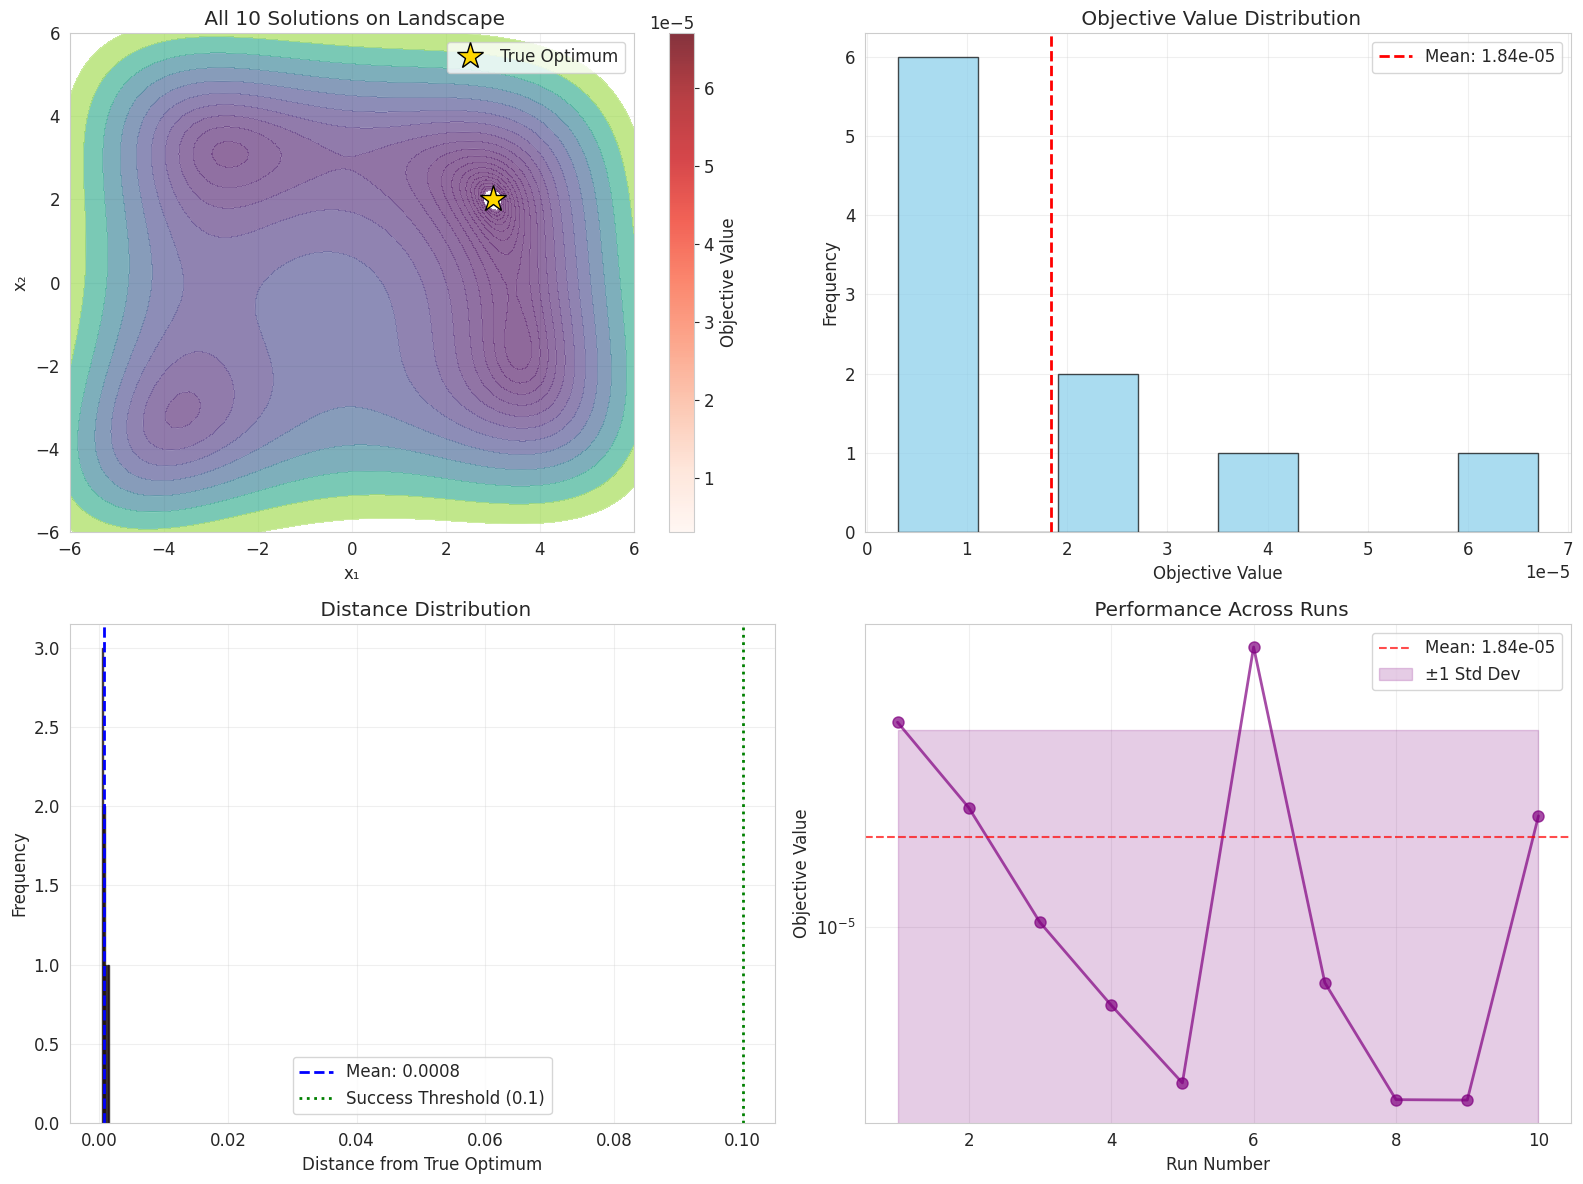

 Statistical analysis visualization complete!


In [9]:
# Visualize statistical performance
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: All solutions on landscape
contour = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.6)
ax1.contour(X, Y, Z, levels=levels, colors='white', alpha=0.3, linewidths=0.5)

# Plot all solutions
solutions = np.array(multi_results['solutions'])
scatter = ax1.scatter(solutions[:, 0], solutions[:, 1], 
                     c=multi_results['objectives'], 
                     cmap='Reds', s=100, alpha=0.8, 
                     edgecolors='white', linewidth=2)

# Mark true optimum
ax1.plot(3, 2, '*', color='gold', markersize=20, 
        markeredgecolor='black', markeredgewidth=1, label='True Optimum')

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title(f' All {n_runs} Solutions on Landscape')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Objective Value')

# Plot 2: Objective value distribution
ax2.hist(objectives, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
ax2.axvline(objectives.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {objectives.mean():.2e}')
ax2.set_xlabel('Objective Value')
ax2.set_ylabel('Frequency')
ax2.set_title(' Objective Value Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Distance distribution
ax3.hist(distances, bins=8, alpha=0.7, color='lightcoral', edgecolor='black')
ax3.axvline(distances.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {distances.mean():.4f}')
ax3.axvline(0.1, color='green', linestyle=':', linewidth=2, label='Success Threshold (0.1)')
ax3.set_xlabel('Distance from True Optimum')
ax3.set_ylabel('Frequency')
ax3.set_title(' Distance Distribution')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Convergence trend
run_numbers = range(1, n_runs + 1)
ax4.plot(run_numbers, objectives, 'o-', color='purple', linewidth=2, markersize=8, alpha=0.7)
ax4.axhline(objectives.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {objectives.mean():.2e}')
ax4.fill_between(run_numbers, 
                objectives.mean() - objectives.std(), 
                objectives.mean() + objectives.std(), 
                alpha=0.2, color='purple', label='±1 Std Dev')
ax4.set_xlabel('Run Number')
ax4.set_ylabel('Objective Value')
ax4.set_title(' Performance Across Runs')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.set_yscale('log')

plt.tight_layout()
plt.show()

print(" Statistical analysis visualization complete!")

So for this problem there is little dependence of output on random seed.

### Demonstration of easy of switching between different heuristic optimizer algorithms

The idea here is to demonstrate a CoFI principle of setting up a problem once and then being able to easy switch between algorothms within the same class. 

In [10]:
# Demonstrate CoFI's "define once, solve many ways" principle
optimizers = [
    {
        'name': 'SMA (OriginalSMA)',
        'tool': 'mealpy.sma',
        'params': {'algorithm': 'OriginalSMA', 'epoch': 50, 'pop_size': 30, 'seed': 42},
        'color': '#FF6B6B'
    },
    {
        'name': 'SMA (DevSMA)',
        'tool': 'mealpy.slime_mould',  # Test the alias!
        'params': {'algorithm': 'DevSMA', 'epoch': 50, 'pop_size': 30, 'seed': 42},
        'color': '#4ECDC4'
    },
    {
        'name': 'Border Collie',
        'tool': 'cofi.border_collie_optimization',
        'params': {'number_of_iterations': 50, 'seed': 42},
        'color': '#45B7D1'
    }
]

print(" CoFI Framework Demonstration: Same Problem, Multiple Solvers\n")
print(" Problem Definition (defined once):")
print(f"    Objective: Modified Himmelblau function")
print(f"    Dimensions: 2D")
print(f"    Bounds: [-6, 6] × [-6, 6]")
print("\n Testing Multiple Optimizers...\n")

optimizer_results = {}

# Suppress mealpy output during runs
import sys
from io import StringIO

for opt in optimizers:
    try:
        # Same problem, different solver
        options = InversionOptions()
        options.set_tool(opt['tool'])
        options.set_params(**opt['params'])
        
        print(f" Running {opt['name']}...")
        
        # Suppress output for SMA runs only
        if 'mealpy' in opt['tool']:
            old_stdout = sys.stdout
            sys.stdout = StringIO()
        
        try:
            inversion = Inversion(problem, options)  # Same problem definition!
            result = inversion.run()
        finally:
            if 'mealpy' in opt['tool']:
                sys.stdout = old_stdout
        
        distance = np.linalg.norm(result.model - true_optimum)
        optimizer_results[opt['name']] = {
            'solution': result.model,
            'objective': result.objective,
            'distance': distance,
            'color': opt['color'],
            'success': result.success
        }
        
        print(f"    Solution: [{result.model[0]:.4f}, {result.model[1]:.4f}]")
        print(f"    Objective: {result.objective:.6f}")
        print(f"    Distance: {distance:.6f}")
        print(f"    Success: {result.success}\n")
        
    except Exception as e:
        print(f"    Failed: {str(e)[:50]}...\n")
        optimizer_results[opt['name']] = None

print(" Multi-optimizer comparison complete!")

2025/08/15 03:57:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: OriginalSMA(epoch=50, pop_size=30, p_t=0.03)
2025/08/15 03:57:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 1, Current best: 15.954506000839949, Global best: 13.908377223146625, Runtime: 0.00284 seconds
2025/08/15 03:57:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 2, Current best: 10.296957274267095, Global best: 10.296957274267095, Runtime: 0.00157 seconds
2025/08/15 03:57:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 3, Current best: 11.844062861944819, Global best: 10.296957274267095, Runtime: 0.00141 seconds
2025/08/15 03:57:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 4, Current best: 5.434934242000969, Global best: 5.434934242000969, Runtime: 0.00160 seconds
2025/08/15 03:57:22 PM, INFO, mealpy.bio_based.SMA.OriginalSMA: >>>Problem: P, Epoch: 5, Current best: 3.4667891401021222, Global best: 3.4667891401021222, Runtime: 0.00

 CoFI Framework Demonstration: Same Problem, Multiple Solvers

 Problem Definition (defined once):
    Objective: Modified Himmelblau function
    Dimensions: 2D
    Bounds: [-6, 6] × [-6, 6]

 Testing Multiple Optimizers...

 Running SMA (OriginalSMA)...
    Solution: [2.9995, 1.9998]
    Objective: 0.000010
    Distance: 0.000488
    Success: True

 Running SMA (DevSMA)...
    Solution: [2.9979, 1.9983]
    Objective: 0.000283
    Distance: 0.002672
    Success: True

 Running Border Collie...
    Failed: 'int' object is not subscriptable...

 Multi-optimizer comparison complete!


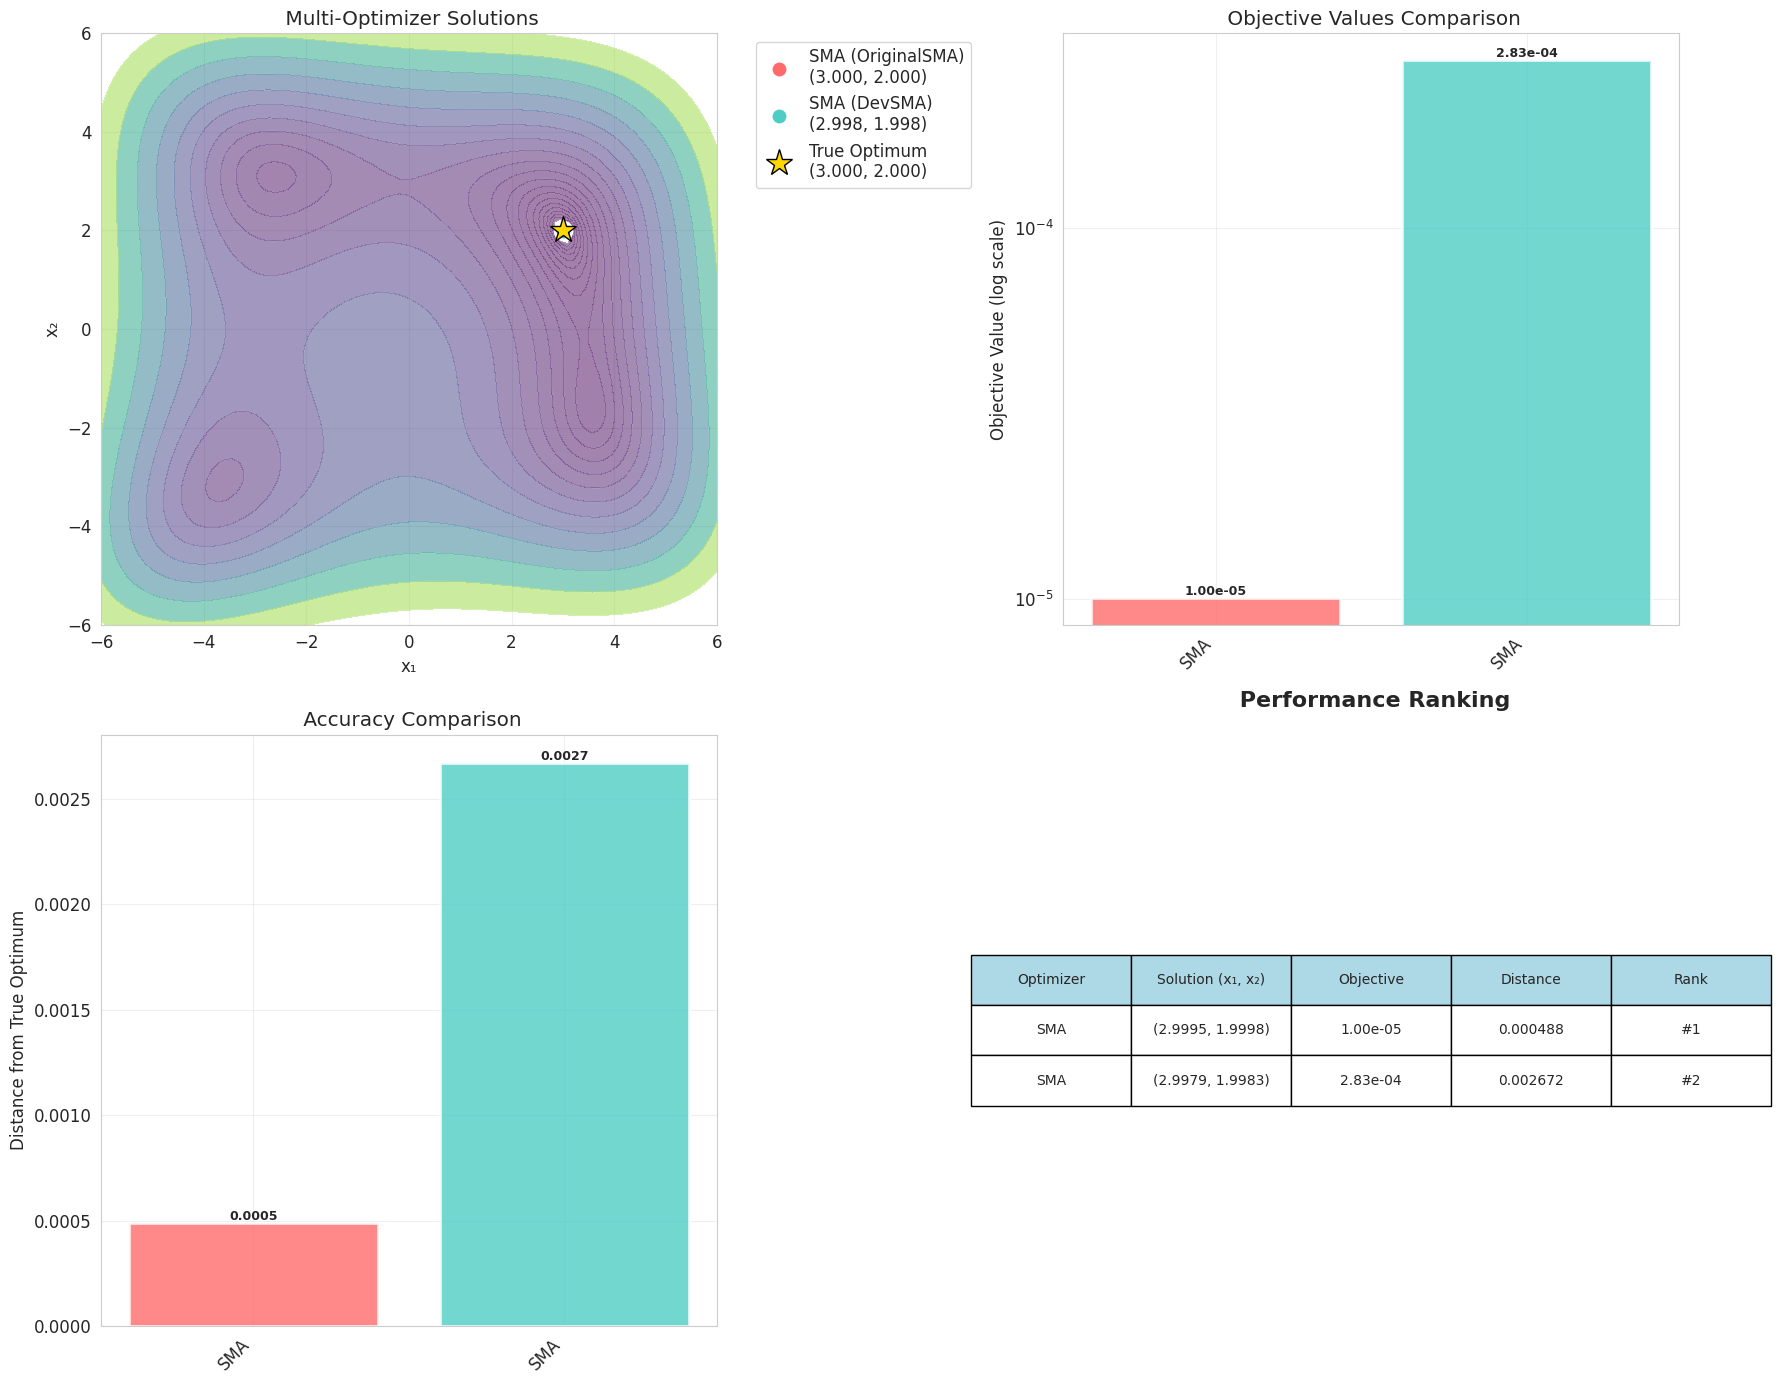


 CoFI's unified framework demonstration complete!
 One problem definition, multiple solvers - that's the power of CoFI!


In [11]:
# Visualize optimizer comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: All optimizer solutions on landscape
contour = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis', alpha=0.5)
ax1.contour(X, Y, Z, levels=levels, colors='white', alpha=0.3, linewidths=0.5)

# Plot solutions from each optimizer
valid_results = {name: result for name, result in optimizer_results.items() if result is not None}

for name, result in valid_results.items():
    ax1.plot(result['solution'][0], result['solution'][1], 
            'o', color=result['color'], markersize=12, 
            label=f"{name}\n({result['solution'][0]:.3f}, {result['solution'][1]:.3f})",
            markeredgecolor='white', markeredgewidth=2)

# Mark true optimum
ax1.plot(3, 2, '*', color='gold', markersize=20, 
        label='True Optimum\n(3.000, 2.000)',
        markeredgecolor='black', markeredgewidth=1)

ax1.set_xlabel('x₁')
ax1.set_ylabel('x₂')
ax1.set_title(' Multi-Optimizer Solutions')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Objective values comparison
names = list(valid_results.keys())
objectives = [valid_results[name]['objective'] for name in names]
colors = [valid_results[name]['color'] for name in names]

bars = ax2.bar(range(len(names)), objectives, color=colors, alpha=0.8, 
              edgecolor='white', linewidth=2)
ax2.set_xticks(range(len(names)))
ax2.set_xticklabels([name.split('(')[0].strip() for name in names], rotation=45, ha='right')
ax2.set_ylabel('Objective Value (log scale)')
ax2.set_title(' Objective Values Comparison')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

# Add value labels
for bar, obj in zip(bars, objectives):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{obj:.2e}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 3: Distance comparison
distances = [valid_results[name]['distance'] for name in names]
bars = ax3.bar(range(len(names)), distances, color=colors, alpha=0.8, 
              edgecolor='white', linewidth=2)
ax3.set_xticks(range(len(names)))
ax3.set_xticklabels([name.split('(')[0].strip() for name in names], rotation=45, ha='right')
ax3.set_ylabel('Distance from True Optimum')
ax3.set_title(' Accuracy Comparison')
ax3.grid(True, alpha=0.3)

# Add value labels
for bar, dist in zip(bars, distances):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{dist:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 4: Performance radar chart
ax4.axis('off')

# Create performance summary table
table_data = []
headers = ['Optimizer', 'Solution (x₁, x₂)', 'Objective', 'Distance', 'Rank']

# Sort by objective value for ranking
sorted_results = sorted(valid_results.items(), key=lambda x: x[1]['objective'])

for rank, (name, result) in enumerate(sorted_results, 1):
    table_data.append([
        name.split('(')[0].strip(),
        f"({result['solution'][0]:.4f}, {result['solution'][1]:.4f})",
        f"{result['objective']:.2e}",
        f"{result['distance']:.6f}",
        f"#{rank}"
    ])

table = ax4.table(cellText=table_data,
                 colLabels=headers,
                 cellLoc='center',
                 loc='center',
                 colColours=['lightblue']*5)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.3, 2.5)
ax4.set_title(' Performance Ranking', pad=20, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n CoFI's unified framework demonstration complete!")
print(" One problem definition, multiple solvers - that's the power of CoFI!")

## Some Conclusions

### Slime Mould Algorithm Performance

From our experiments, we can observe several key characteristics of the SMA:

1. **Satisfactory Global Optimization**: SMA consistently finds solutions very close to the global optimum.
2. **Robust Convergence**: Multiple runs show consistent performance with low variance
3. **Efficient Exploration**: The algorithm effectively explores the multi-modal landscape
4. **Bio-inspired Intelligence**: The slime mould foraging behavior translates well to optimization
5. ** Caveat** This problem is low dimensional and has relatively few minima.

### CoFI Integration Benefits

The integration of SMA into CoFI demonstrates several advantages:

- **Unified Interface**: Same problem definition works with all optimizers
- **Easy Configuration**: Simple parameter setting and algorithm selection
- **Consistent Results**: Standardized result format across all tools
- **Extensibility**: Easy to add new algorithms and compare performance

### Applications in Geophysics

At present experience is limited, but SMA is may be suited for geophysical inverse problems because:

- **Multi-modal Landscapes**: Many geophysical problems have multiple local minima
- **Gradient-free**: Works with non-differentiable objective functions
- **Global Search**: Able to find global solutions in complex parameter spaces

## Extension case

If my model parameters represented a 2D spatial field, how would I add in regularization to the objective and optimize with SMA? 

### Here's how

```python
# Example: Using SMA with spatial regularization
from cofi.utils import QuadraticReg

# Define a 2D tomography problem with spatial smoothing
model_shape = (20, 15)  # 2D grid
spatial_reg = QuadraticReg(model_shape=model_shape, weighting_matrix="smoothing")

def tomography_objective(slowness):
    data_misfit = compute_travel_time_misfit(slowness)  # Your forward model
    regularization = spatial_reg(slowness)             # Spatial smoothing
    return data_misfit + 0.1 * regularization          # Combined objective

# CoFI handles the vector abstraction automatically!
problem = BaseProblem()
problem.set_objective(tomography_objective)
problem.set_model_shape(model_shape)  # 2D spatial model
problem.set_bounds((1.0, 5.0))        # Slowness bounds

# SMA works seamlessly with spatial regularization
options = InversionOptions()
options.set_tool("mealpy.sma")
options.set_params(epoch=200, pop_size=100)

result = Inversion(problem, options).run()
```


###  Further Reading

- **Original SMA Paper**: Li et al. (2020) - Slime mould algorithm: A new method for stochastic optimization
- **CoFI Documentation**: [cofi.readthedocs.io](https://cofi.readthedocs.io)
- **Mealpy Library**: [mealpy.readthedocs.io](https://mealpy.readthedocs.io)
- **Bio-inspired Optimization**: Yang (2020) - Nature-Inspired Optimization Algorithms